In [1]:
%pylab
%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
img = np.load('/home/rohitrango/gym-minigrid/gym_minigrid/envs/resources/tmp_grid.npy')
# img[38, 32] = 9

In [3]:
# img[22, 28] = 2
# img[22, 35] = 2
# img[27, 28] = 2
# np.save('/home/rohitrango/gym-minigrid/gym_minigrid/envs/resources/tmp_grid.npy', img)

In [4]:
index_mapping = {
            9: 'empty',
            8: 'agent',
            1: 'agent',
            2: 'door',
            4: 'wall',
            5: 'lava',
            6: 'key',
            7: 'goal',
            3: 'goal',
            0: 'wall',
            10: 'box',
            255: 'box',
}

keys = set(index_mapping.values())
maps = {
    'empty': 0,
    'door': 100,
    'lava': 2, 
    'agent':3,
    'box':3,
    'goal':200, 
    'key': 5,
    'wall': 255
}

In [5]:
img = np.vectorize(lambda x: maps[index_mapping[x]])(img)

In [6]:
plt.figure(figsize=(14, 14))
plt.imshow(img)

In [19]:
# Format: (x1, y1, x2, y2)
data = []
# Upper room
data.append((3, 6, 16, 26))
data.append((16, 6, 27, 14))
data.append((23, 14, 40, 22))
data.append((27, 2, 33, 14))
data.append((33, 2, 39, 14))
data.append((39, 6, 49, 14))
data.append((39, 14, 49, 25))
data.append((15, 14, 23, 21))

# Lower room
data.append((26, 23, 32, 35))
data.append((20, 27, 26, 48))
data.append((20, 35, 33, 48))
data.append((5, 25, 12, 32))
data.append((32, 28, 40, 35))
data.append((20, 35, 33, 43))
data.append((33, 35, 40, 48))
data.append((40, 35, 48, 48))
data.append((40, 22, 48, 35))

In [20]:
x1, y1, x2, y2 = data[-1]
plt.clf()
plt.imshow(img[y1:y2+1, x1:x2+1])

In [23]:
## Visualize with all boxes
fig,ax = plt.subplots(1)
ax.imshow(img, 'gray')
for x1, y1, x2, y2 in data:
    rect = patches.Rectangle((x1,y1),(x2-x1),(y2-y1),linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [24]:
# np.save('/home/rohitrango/gym-minigrid/gym_minigrid/envs/resources/tmp_grid_curriculum.npy', data)

# Room segmentation for dog barks

This part is for segmentation of rooms so that dog can bark.

In [10]:
# Format: (x1, y1, x2, y2)
data = []
# Upper room
data.append((20, 6, 27, 14))
data.append((23, 14, 40, 22))
data.append((27, 6, 33, 14))
data.append((33, 6, 39, 14))
data.append((39, 6, 48, 14))
data.append((40, 14, 48, 22))
data.append((20, 14, 23, 21))

# Lower room
data.append((26, 27, 32, 35))
data.append((20, 35, 33, 43))
data.append((32, 28, 40, 35))
data.append((33, 35, 40, 43))
data.append((40, 35, 48, 43))
data.append((40, 27, 48, 35))

# x1, y1, x2, y2 = data[0]
# plt.clf()
# plt.imshow(img[y1:y2+1, x1:x2+1])

In [11]:
## Visualize with all boxes
fig,ax = plt.subplots(1)
ax.imshow(img, 'gray')
for x1, y1, x2, y2 in data:
    rect = patches.Rectangle((x1,y1),(x2-x1),(y2-y1),linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [29]:
# np.save('/home/rohitrango/gym-minigrid/gym_minigrid/envs/resources/tmp_grid_roominfo.npy', data)

In [12]:
import gym
import gym_minigrid
env = gym.make('MiniGrid-NumpyMapMinecraftUSAR-v0')

{9: 'empty', 8: 'agent', 1: 'agent', 2: 'door', 4: 'wall', 5: 'lava', 6: 'key', 7: 'goal', 3: 'goal', 0: 'unseen', 10: 'box', 255: 'box'}
empty
agent
agent
door
wall
lava
key
goal
goal
unseen
box
box


In [17]:
img = env.render('rgb_array', tile_size=7, )


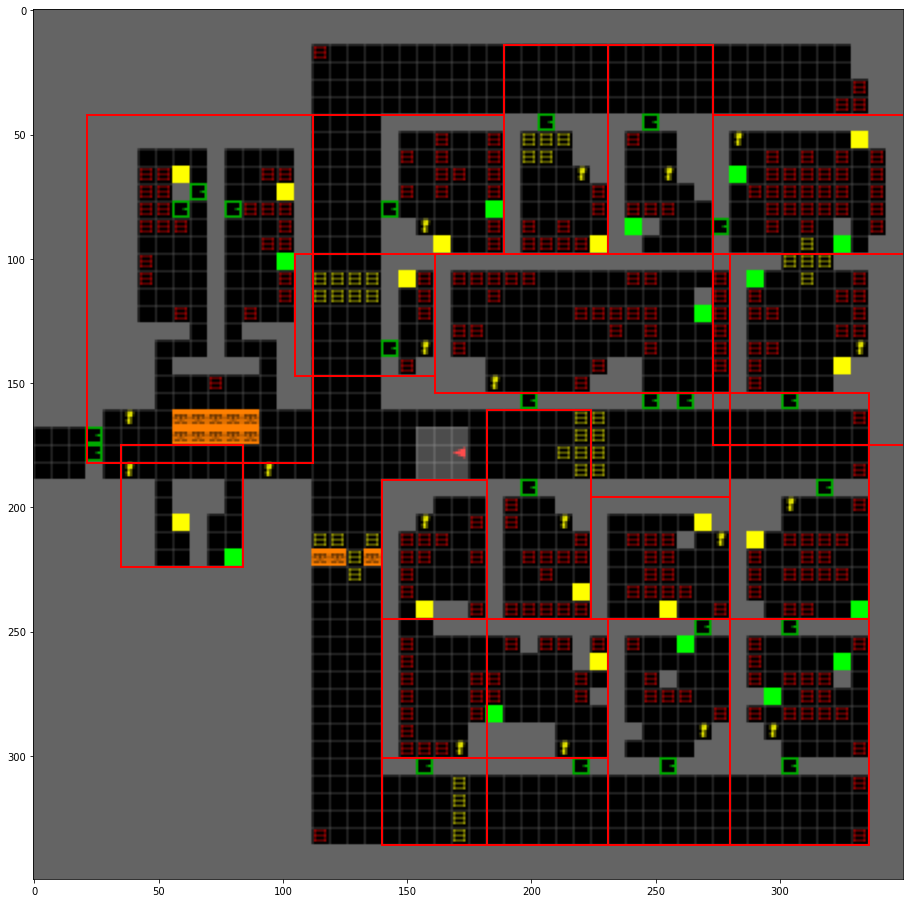

In [23]:
%matplotlib inline
fig,ax = plt.subplots(1, figsize=(16, 16))
ax.imshow(img, 'gray')
for x1, y1, x2, y2 in data:
    x1, y1, x2, y2 = 7*x1, 7*y1, 7*x2, 7*y2
    rect = patches.Rectangle((x1,y1),(x2-x1),(y2-y1),linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)